# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Load dataset, Preprocessing

In [3]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [4]:
output_dim = nb_classes = 10

In [5]:
input_dim = (32,32,3)
X_train = X_train.reshape(50000, *input_dim)
X_test = X_test.reshape(10000, *input_dim)

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
print(input_dim, X_train.shape, Y_train.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) 10


## Build Model

In [14]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 24)        792       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 32)       

In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 378us/sample - loss: 1.9197 - accuracy: 0.3043 - val_loss: 1.6747 - val_accuracy: 0.4021
Epoch 2/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.5220 - accuracy: 0.4529 - val_loss: 1.5336 - val_accuracy: 0.4463
Epoch 3/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.4061 - accuracy: 0.4974 - val_loss: 1.4946 - val_accuracy: 0.4629
Epoch 4/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3418 - accuracy: 0.5232 - val_loss: 1.3423 - val_accuracy: 0.5206
Epoch 5/100
50000/50000 [==============================] - 17s 346us/sample - loss: 1.2990 - accuracy: 0.5405 - val_loss: 1.4571 - val_accuracy: 0.4978
Epoch 6/100
50000/50000 [==============================] - 17s 339us/sample - loss: 1.2652 - accuracy: 0.5515 - val_loss: 1.4092 - val_accuracy: 0.5031
Epoch 7/100
50000/50000 [=============

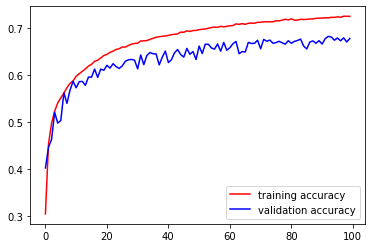

In [46]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

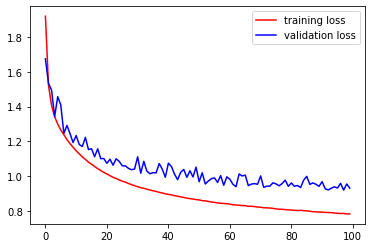

In [47]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_1 = model.predict_classes(X_test)

## arch filter increase

In [65]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_63 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_64 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 14, 14, 24)        792       
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 12, 12, 32)      

In [67]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 29s 576us/sample - loss: 1.7902 - accuracy: 0.3417 - val_loss: 1.6410 - val_accuracy: 0.4024
Epoch 2/100
50000/50000 [==============================] - 28s 557us/sample - loss: 1.4633 - accuracy: 0.4651 - val_loss: 1.4583 - val_accuracy: 0.4753
Epoch 3/100
50000/50000 [==============================] - 28s 556us/sample - loss: 1.3439 - accuracy: 0.5128 - val_loss: 1.3718 - val_accuracy: 0.5050
Epoch 4/100
50000/50000 [==============================] - 28s 557us/sample - loss: 1.2608 - accuracy: 0.5453 - val_loss: 1.3744 - val_accuracy: 0.4978
Epoch 5/100
50000/50000 [==============================] - 28s 552us/sample - loss: 1.2000 - accuracy: 0.5720 - val_loss: 1.2699 - val_accuracy: 0.5410
Epoch 6/100
50000/50000 [==============================] - 27s 550us/sample - loss: 1.1479 - accuracy: 0.5911 - val_loss: 1.2006 - val_accuracy: 0.5697
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 27s 549us/sample - loss: 0.6346 - accuracy: 0.7790 - val_loss: 0.9218 - val_accuracy: 0.6922
Epoch 55/100
50000/50000 [==============================] - 27s 550us/sample - loss: 0.6297 - accuracy: 0.7774 - val_loss: 0.9271 - val_accuracy: 0.6961
Epoch 56/100
50000/50000 [==============================] - 27s 550us/sample - loss: 0.6298 - accuracy: 0.7789 - val_loss: 0.9525 - val_accuracy: 0.6848
Epoch 57/100
50000/50000 [==============================] - 27s 549us/sample - loss: 0.6241 - accuracy: 0.7824 - val_loss: 1.0058 - val_accuracy: 0.6653
Epoch 58/100
50000/50000 [==============================] - 27s 548us/sample - loss: 0.6212 - accuracy: 0.7844 - val_loss: 0.9869 - val_accuracy: 0.6746
Epoch 59/100
50000/50000 [==============================] - 27s 548us/sample - loss: 0.6190 - accuracy: 0.7827 - val_loss: 0.9421 - val_accuracy: 0.6898
Epoch 60/100
50000/50000 [==============================] - 27s 548us/sample - loss: 0.6145 - a

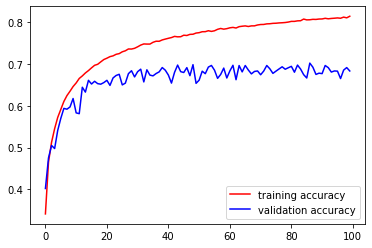

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

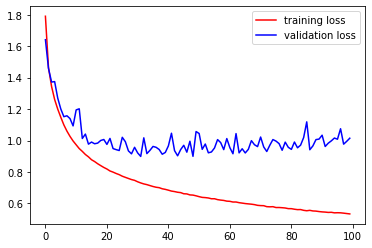

In [70]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [71]:
predictions_2 = model.predict_classes(X_test)

TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64

## arch 2 filter increase & delete layer

In [72]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [73]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_66 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_67 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 14, 14, 24)        792       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 12, 12, 32)      

In [74]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 29s 582us/sample - loss: 1.6377 - accuracy: 0.4258 - val_loss: 2.1831 - val_accuracy: 0.3763
Epoch 2/100
50000/50000 [==============================] - 28s 557us/sample - loss: 1.2788 - accuracy: 0.5474 - val_loss: 1.3359 - val_accuracy: 0.5382
Epoch 3/100
50000/50000 [==============================] - 28s 554us/sample - loss: 1.1501 - accuracy: 0.5980 - val_loss: 1.2536 - val_accuracy: 0.5752
Epoch 4/100
50000/50000 [==============================] - 28s 555us/sample - loss: 1.0601 - accuracy: 0.6306 - val_loss: 1.1161 - val_accuracy: 0.6076
Epoch 5/100
50000/50000 [==============================] - 28s 556us/sample - loss: 1.0002 - accuracy: 0.6530 - val_loss: 1.2638 - val_accuracy: 0.5651
Epoch 6/100
50000/50000 [==============================] - 28s 559us/sample - loss: 0.9553 - accuracy: 0.6711 - val_loss: 1.0909 - val_accuracy: 0.6206
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 28s 552us/sample - loss: 0.4863 - accuracy: 0.8300 - val_loss: 1.0313 - val_accuracy: 0.6914
Epoch 55/100
50000/50000 [==============================] - 28s 552us/sample - loss: 0.4841 - accuracy: 0.8324 - val_loss: 0.9562 - val_accuracy: 0.7050
Epoch 56/100
50000/50000 [==============================] - 28s 550us/sample - loss: 0.4795 - accuracy: 0.8333 - val_loss: 0.9730 - val_accuracy: 0.7026
Epoch 57/100
50000/50000 [==============================] - 28s 552us/sample - loss: 0.4772 - accuracy: 0.8336 - val_loss: 1.0617 - val_accuracy: 0.6764
Epoch 58/100
50000/50000 [==============================] - 28s 550us/sample - loss: 0.4740 - accuracy: 0.8346 - val_loss: 1.0237 - val_accuracy: 0.6959
Epoch 59/100
50000/50000 [==============================] - 28s 551us/sample - loss: 0.4723 - accuracy: 0.8344 - val_loss: 1.0311 - val_accuracy: 0.6964
Epoch 60/100
50000/50000 [==============================] - 27s 547us/sample - loss: 0.4671 - a

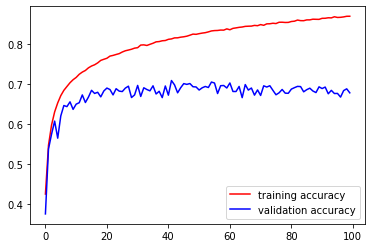

In [76]:

plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

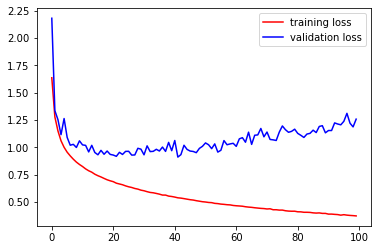

In [77]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [ ]:
predictions_3 = model.predict_classes(X_test)

## arch filter increase & delete layer & padding

In [78]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(16,1, activation='relu'))

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [79]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_69 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_70 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 15, 15, 16)        528       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 7, 7, 16)        

In [80]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 29s 573us/sample - loss: 1.7017 - accuracy: 0.3973 - val_loss: 1.5546 - val_accuracy: 0.4423
Epoch 2/100
50000/50000 [==============================] - 26s 525us/sample - loss: 1.3726 - accuracy: 0.5119 - val_loss: 1.4871 - val_accuracy: 0.4862
Epoch 3/100
50000/50000 [==============================] - 26s 525us/sample - loss: 1.2405 - accuracy: 0.5630 - val_loss: 1.3448 - val_accuracy: 0.5301
Epoch 4/100
50000/50000 [==============================] - 26s 523us/sample - loss: 1.1589 - accuracy: 0.5937 - val_loss: 1.1739 - val_accuracy: 0.5931
Epoch 5/100
50000/50000 [==============================] - 26s 524us/sample - loss: 1.1017 - accuracy: 0.6162 - val_loss: 1.2296 - val_accuracy: 0.5723
Epoch 6/100
50000/50000 [==============================] - 26s 523us/sample - loss: 1.0590 - accuracy: 0.6325 - val_loss: 1.1249 - val_accuracy: 0.6064
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 26s 524us/sample - loss: 0.7347 - accuracy: 0.7458 - val_loss: 0.9248 - val_accuracy: 0.6872
Epoch 55/100
50000/50000 [==============================] - 26s 523us/sample - loss: 0.7312 - accuracy: 0.7458 - val_loss: 0.9955 - val_accuracy: 0.6574
Epoch 56/100
50000/50000 [==============================] - 26s 523us/sample - loss: 0.7297 - accuracy: 0.7488 - val_loss: 0.9995 - val_accuracy: 0.6638
Epoch 57/100
50000/50000 [==============================] - 26s 523us/sample - loss: 0.7261 - accuracy: 0.7497 - val_loss: 0.9921 - val_accuracy: 0.6623
Epoch 58/100
50000/50000 [==============================] - 26s 522us/sample - loss: 0.7229 - accuracy: 0.7496 - val_loss: 0.9915 - val_accuracy: 0.6619
Epoch 59/100
50000/50000 [==============================] - 26s 523us/sample - loss: 0.7217 - accuracy: 0.7507 - val_loss: 0.9585 - val_accuracy: 0.6803
Epoch 60/100
50000/50000 [==============================] - 26s 524us/sample - loss: 0.7206 - a

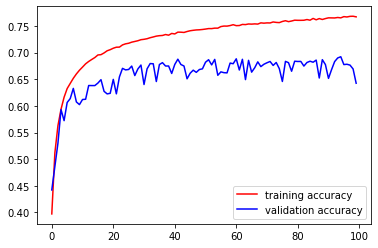

In [82]:

plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

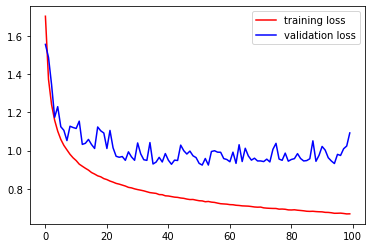

In [83]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [ ]:
predictions_3 = model.predict_classes(X_test)